# Exploratory Data Analysis for UAE housing dataset

### Goal:
1. To find the realtion between the data,
2. To visualize the data
3. To explore the data and create a important insight from it,
4. To fineturn and perfom basic machine learning test


### Dataset Used:
The dataset used in following project is obtained from kaggle - https://www.kaggle.com/datasets/thapasajan/dubai-real-estate-property-listings/data

### Project Perfomed by :
-> Sajan Thapa / https://github.com/Coolsajan

# 2. DataSet

In [1]:
# importing the necessary libaries / libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [2]:
# loading dataset 
dataframe=pd.read_csv(r"P:\webscraper-UAE-housing\Dataset\uae-housing_dataset.csv")
dataframe.head()

,price,bedroom,bathroom,area(sqft),country,city,address,propert_type,purpose,furnishing,completion_status,handover,project_name
0,"1,800,000",3 beds,4 baths,"1,208 sqft",UAE,Dubai,DAMAC Hills 2 (Akoya by DAMAC),Townhouse,Sale,Unfurnished,Off-Plan,Q2 2025,Camelia Villas
1,"325,000",Studio,1 bath,483 sqft,UAE,Dubai,International City,Apartment,Sale,Unfurnished,Ready,Q2 2025,Camelia Villas
2,"470,000",Studio,1 bath,428 sqft,UAE,Dubai,Arjan,Apartment,Sale,Furnished,Ready,Q2 2025,Camelia Villas
3,"1,120,000",1 bed,1 bath,706 sqft,UAE,Dubai,Dubai South,Apartment,Sale,Unfurnished,Off-Plan,Q3 2029,Camelia Villas
4,"2,127,888",2 beds,2 baths,"1,149 sqft",UAE,Dubai,Dubai South,Apartment,Sale,Unfurnished,Off-Plan,Q3 2029,Camelia Villas


In [3]:
print(f"The data structure of our dataset is : {dataframe.shape}",
     f"The no of column are : {dataframe.shape[1]}",
     f"The no of rows are : {dataframe.shape[0]}",sep="\n")

The data structure of our dataset is : (5378, 13)
The no of column are : 13
The no of rows are : 5378


In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5378 entries, 0 to 5377
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   price              5378 non-null   object
 1   bedroom            5378 non-null   object
 2   bathroom           5378 non-null   object
 3   area(sqft)         5378 non-null   object
 4   country            5378 non-null   object
 5   city               5378 non-null   object
 6   address            5378 non-null   object
 7   propert_type       5378 non-null   object
 8   purpose            5378 non-null   object
 9   furnishing         5378 non-null   object
 10  completion_status  5378 non-null   object
 11  handover           5378 non-null   object
 12  project_name       5378 non-null   object
dtypes: object(13)
memory usage: 546.3+ KB


### Correcting the  dtypes

In [5]:
def clean_bedroom(bedroom:pd.Series):
    bedroom=bedroom.apply(lambda x:x.lower())
    for i in range(len(dataframe['bedroom'])):
        if "bed" in bedroom[i]:
            bedroom[i]=bedroom[i].split()[0]
        elif "studio" in bedroom[i]:
            bedroom[i]=float(0.5)

    return bedroom    

In [6]:
def quater_to_float(handover_data):
    """this will convert your handover data into float"""
    q,y=handover_data.split()
    q=int(q[1])
    return  int(y) + (q-1)*0.25

In [7]:
dataframe['price']=dataframe['price'].str.replace(",","").astype(int)
dataframe["bedroom"]=clean_bedroom(dataframe['bedroom']).astype(float)
dataframe['bathroom']=(dataframe['bathroom'].str.split().str[0]).astype(int)
dataframe['area(sqft)']=(dataframe['area(sqft)'].str.split().str[0]).str.replace(",","").astype(float)
dataframe['handover']=dataframe['handover'].apply(quater_to_float)

In [8]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5378 entries, 0 to 5377
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              5378 non-null   int32  
 1   bedroom            5378 non-null   float64
 2   bathroom           5378 non-null   int32  
 3   area(sqft)         5378 non-null   float64
 4   country            5378 non-null   object 
 5   city               5378 non-null   object 
 6   address            5378 non-null   object 
 7   propert_type       5378 non-null   object 
 8   purpose            5378 non-null   object 
 9   furnishing         5378 non-null   object 
 10  completion_status  5378 non-null   object 
 11  handover           5378 non-null   float64
 12  project_name       5378 non-null   object 
dtypes: float64(3), int32(2), object(8)
memory usage: 504.3+ KB


In [9]:
# checking for the unique values for all the categorical features.
result={}
for feature in dataframe.columns:
  unique_values=dataframe[feature].unique() if len(dataframe[feature].unique()) <=5 else "Values counts over 5"
  no_unique_vales=len(dataframe[feature].unique())
  result[feature]=unique_values ,"----", no_unique_vales
pd.Series(result)

price                 (Values counts over 5, ----, 1315)
bedroom                 (Values counts over 5, ----, 11)
bathroom                (Values counts over 5, ----, 11)
area(sqft)            (Values counts over 5, ----, 1601)
country                                ([ UAE], ----, 1)
city                                 ([ Dubai], ----, 1)
address                (Values counts over 5, ----, 119)
propert_type             (Values counts over 5, ----, 6)
purpose                                ([Sale], ----, 1)
furnishing           ([Unfurnished, Furnished], ----, 2)
completion_status           ([Off-Plan, Ready], ----, 2)
handover                (Values counts over 5, ----, 25)
project_name           (Values counts over 5, ----, 868)
dtype: object

## Observation
#### Since `country`,`city`,`purpose` has only sine value (i.e Only one unique values ) it really doesnt affect the resut.

In [10]:
main_df=dataframe.copy()
dataframe=dataframe.drop(columns=["country",'city','purpose'])

In [11]:
print(f'The present features are:{list(dataframe.columns)}')

The present features are:['price', 'bedroom', 'bathroom', 'area(sqft)', 'address', 'propert_type', 'furnishing', 'completion_status', 'handover', 'project_name']


In [12]:
numerical_feature=[feature for feature in dataframe.columns if dataframe[feature].dtype !="O"]
categorical_feature=[feature for feature in dataframe.columns if dataframe[feature].dtype =="O"]
print(f"Numerical Featuers : {numerical_feature}")
print(f"Categorical Feature : {categorical_feature}")

Numerical Featuers : ['price', 'bedroom', 'bathroom', 'area(sqft)', 'handover']
Categorical Feature : ['address', 'propert_type', 'furnishing', 'completion_status', 'project_name']


## *Numerical Feature*

In [13]:
print(f"Numerical feature from out dataset are: {numerical_feature}")

Numerical feature from out dataset are: ['price', 'bedroom', 'bathroom', 'area(sqft)', 'handover']


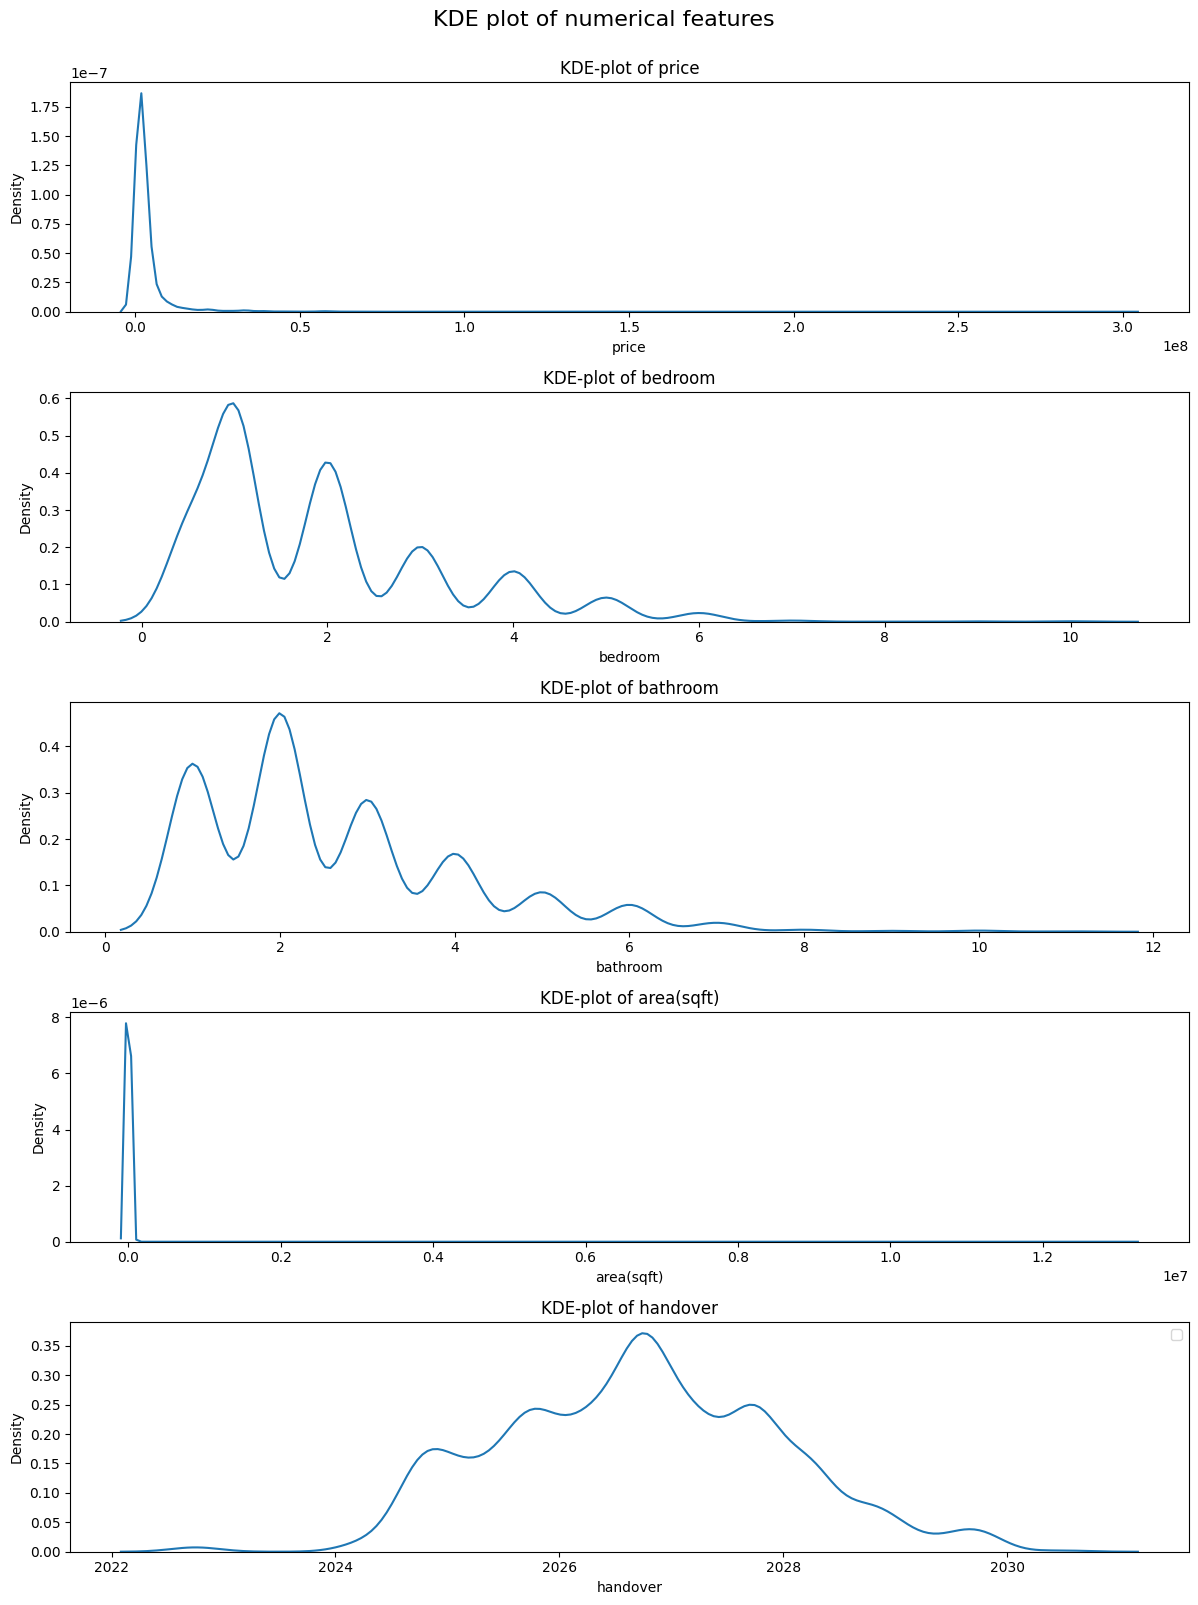

In [14]:
fig,ax=plt.subplots(len(numerical_feature),1,figsize=(12,16))
plt.suptitle("KDE plot of numerical features",x=0.5,y=1,fontsize=16)
for i,feature in enumerate(numerical_feature):
    sns.kdeplot(data=dataframe,x=feature,ax=ax[i],palette="set2")
    ax[i].set_title(f"KDE-plot of {feature}")
plt.legend()
plt.tight_layout()
plt.show()

## Observation:
1. `price`,`area`has the rightly screwed data which can be normalized using log transform, 
2. `bedroom`,`bathroom` has the slightly right screwed data with spikes, 
3. `handover` has the normal but spikey data distribution.

## *Categorical Features*

In [15]:
print(f"Categorical feature from out dataset are: {categorical_feature}")

Categorical feature from out dataset are: ['address', 'propert_type', 'furnishing', 'completion_status', 'project_name']


In [16]:
for i,feature in enumerate(categorical_feature):
    print(f"{i+1}. {feature} has {(len(dataframe[feature].unique()))} unique values.")
    

1. address has 119 unique values.
2. propert_type has 6 unique values.
3. furnishing has 2 unique values.
4. completion_status has 2 unique values.
5. project_name has 868 unique values.


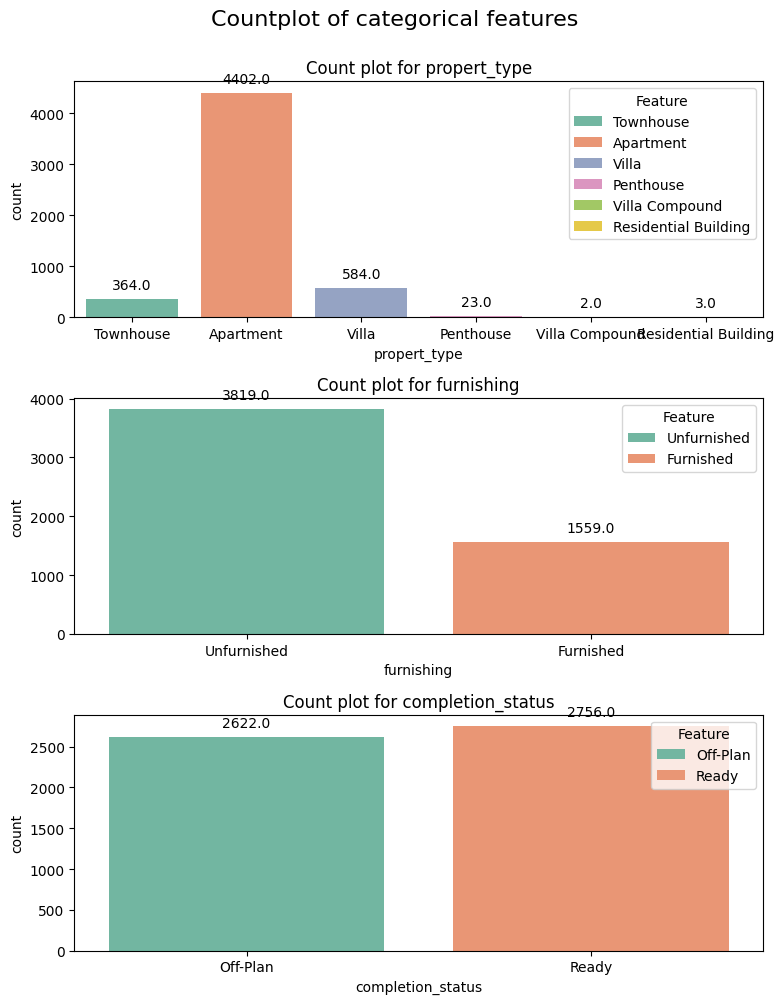

In [17]:
count_cate_plot=['propert_type','furnishing','completion_status']

fig,ax = plt.subplots(len(count_cate_plot),1,figsize=(8,10))
plt.suptitle("Countplot of categorical features",x=0.5,y=1,fontsize=16)
for i,feature in enumerate(count_cate_plot):
    sns.countplot(data=dataframe,x=feature,ax=ax[i],palette="Set2")
    ax[i].set_title(f"Count plot for {feature}")
    for p in ax[i].patches:
        height = p.get_height()
        ax[i].annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                       ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                       textcoords='offset points')
    
    ax[i].legend(dataframe[feature].unique(), title="Feature")
plt.tight_layout()
plt.show()

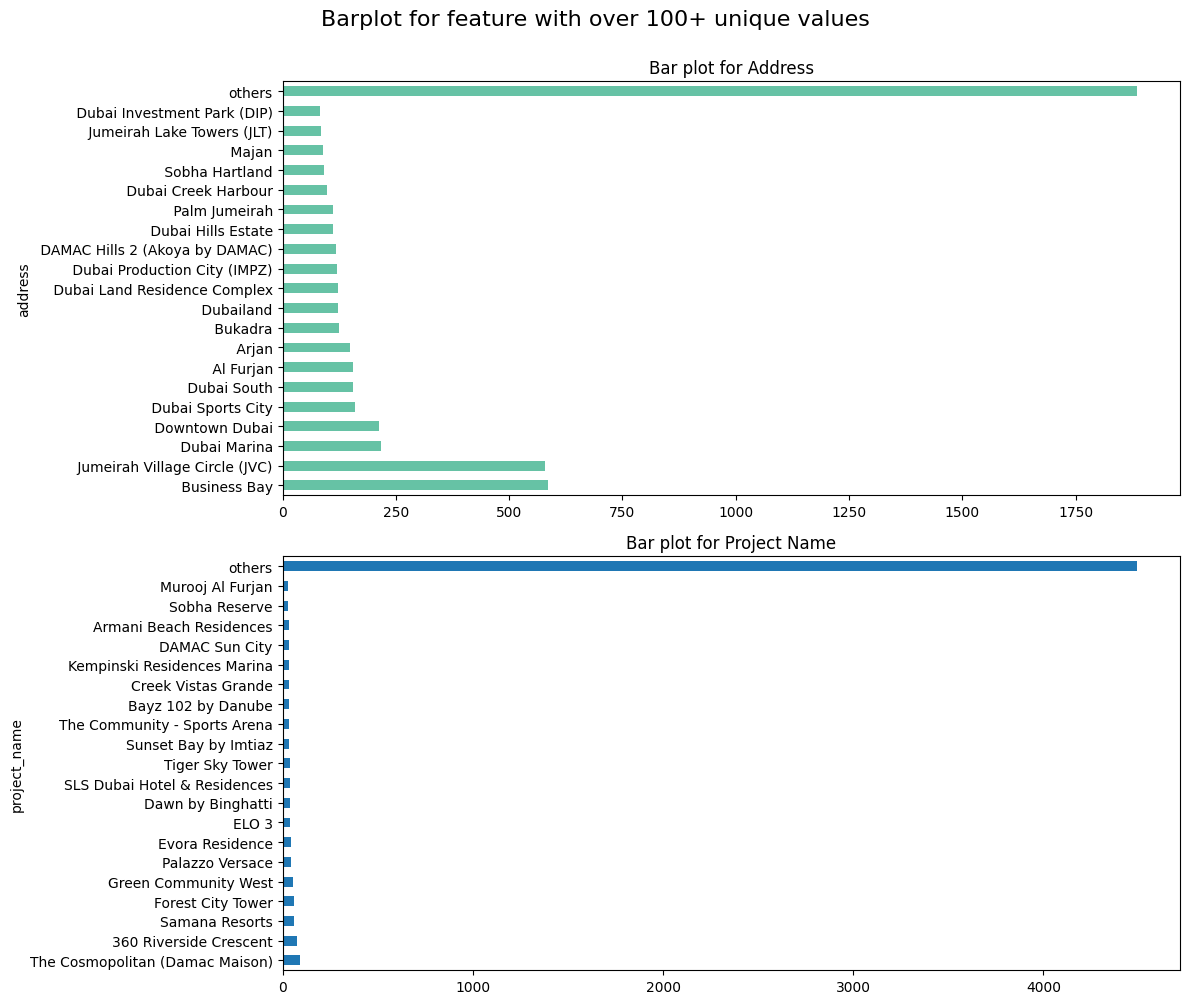

In [18]:
top_n=20
vc_address=dataframe['address'].value_counts()
plot_address=vc_address[:top_n]
plot_address["others"]=vc_address[top_n:].sum()

vc_projectname=dataframe['project_name'].value_counts()
plot_projectname=vc_projectname[:top_n]
plot_projectname["others"]=vc_projectname[top_n:].sum()


fig,ax=plt.subplots(2,1,figsize=(12,10))
plt.suptitle("Barplot for feature with over 100+ unique values",x=0.5,y=1,fontsize=16)
plot_address.plot(kind="barh",ax=ax[0],colormap="Set2",title="Bar plot for Address")
plot_projectname.plot(kind="barh",ax=ax[1],title="Bar plot for Project Name")
plt.tight_layout()
plt.show()


In [19]:
print(dataframe["address"].value_counts().sort_values(ascending=False)[:20])
print("")
print(dataframe["project_name"].value_counts().sort_values(ascending=False)[:20])

address
Business Bay                      585
Jumeirah Village Circle (JVC)     579
Dubai Marina                      217
Downtown Dubai                    212
Dubai Sports City                 159
Dubai South                       156
Al Furjan                         156
Arjan                             149
Bukadra                           125
Dubailand                         123
Dubai Land Residence Complex      122
Dubai Production City (IMPZ)      121
DAMAC Hills 2 (Akoya by DAMAC)    117
Dubai Hills Estate                112
Palm Jumeirah                     112
Dubai Creek Harbour                99
Sobha Hartland                     91
Majan                              89
Jumeirah Lake Towers (JLT)         85
Dubai Investment Park (DIP)        83
Name: count, dtype: int64

project_name
The Cosmopolitan (Damac Maison)    94
360 Riverside Crescent             75
Samana Resorts                     61
Forest City Tower                  59
Green Community West               55
Pa

### OBSERVATION
`completion_status` is aboutly equally distributed. \
`furnishing` has about 2/3 part as unfurnished and 1/3 part as furnsihed, \
`property_type` has the maximum count of appartment and has cover like 90% od data and has townhous,villa,penthouse,villa_compound resident bulidng as other values, \
`project_name` has the higest value count of 94 and has constant decline in value counts, \
`address` has the higest value count of 584 and has sclant decline in value counts

### *Discrete or Continious data*

In [20]:
discrete_feature=[feature for feature in numerical_feature if len(dataframe[feature].unique())< 25]
continious_feature=[feature for feature in numerical_feature if len(dataframe[feature].unique())> 25]
print(f"The feature with discrete values are :{discrete_feature}",
     f"The feature with contionus values are :{continious_feature}",
      sep="\n")

The feature with discrete values are :['bedroom', 'bathroom']
The feature with contionus values are :['price', 'area(sqft)']


### *Check Multicollinearity in Numerical features*

In [21]:
dataframe.corr(numeric_only=True)

,price,bedroom,bathroom,area(sqft),handover
price,1.000000,0.465579,0.452119,0.023910,-0.013349
bedroom,0.465579,1.000000,0.932659,0.029873,0.001017
bathroom,0.452119,0.932659,1.000000,0.038821,-0.018603
area(sqft),0.023910,0.029873,0.038821,1.000000,0.030346
handover,-0.013349,0.001017,-0.018603,0.030346,1.000000


### Observation:
`price` is our target. \
`bedroom`,`bathroom` show slight correlation with target feature \
`area(sqft)`,`handover` shows low corealtion with target feature

### *Check Multicollinearity in Categorical features*

* **A chi-squared test (also chi-square or χ2 test) is a statistical hypothesis test that is valid to perform when the test statistic is chi-squared distributed under the null hypothesis, specifically Pearson's chi-squared test**
 
* **A chi-square statistic is one way to show a relationship between two categorical variables.**

* **Here we test correlation of Categorical columns with Target column i.e case_status**

Null Hypothesis ($ H_0 $): The Feature is independent of target column (No-Correlation)

Alternative Hypothesis ($ H_1 $): The Feature and Target column are not independent (Correalted)

In [22]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in categorical_feature:
    if chi2_contingency(pd.crosstab(dataframe['price'], dataframe[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[categorical_feature, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,address,Reject Null Hypothesis
1,propert_type,Reject Null Hypothesis
2,furnishing,Reject Null Hypothesis
3,completion_status,Reject Null Hypothesis
4,project_name,Reject Null Hypothesis


### *Report*
#### Every categorical feature reject Null Hypothese ie we have corelation with target and categorical features.

## *Multivariate Analysis*

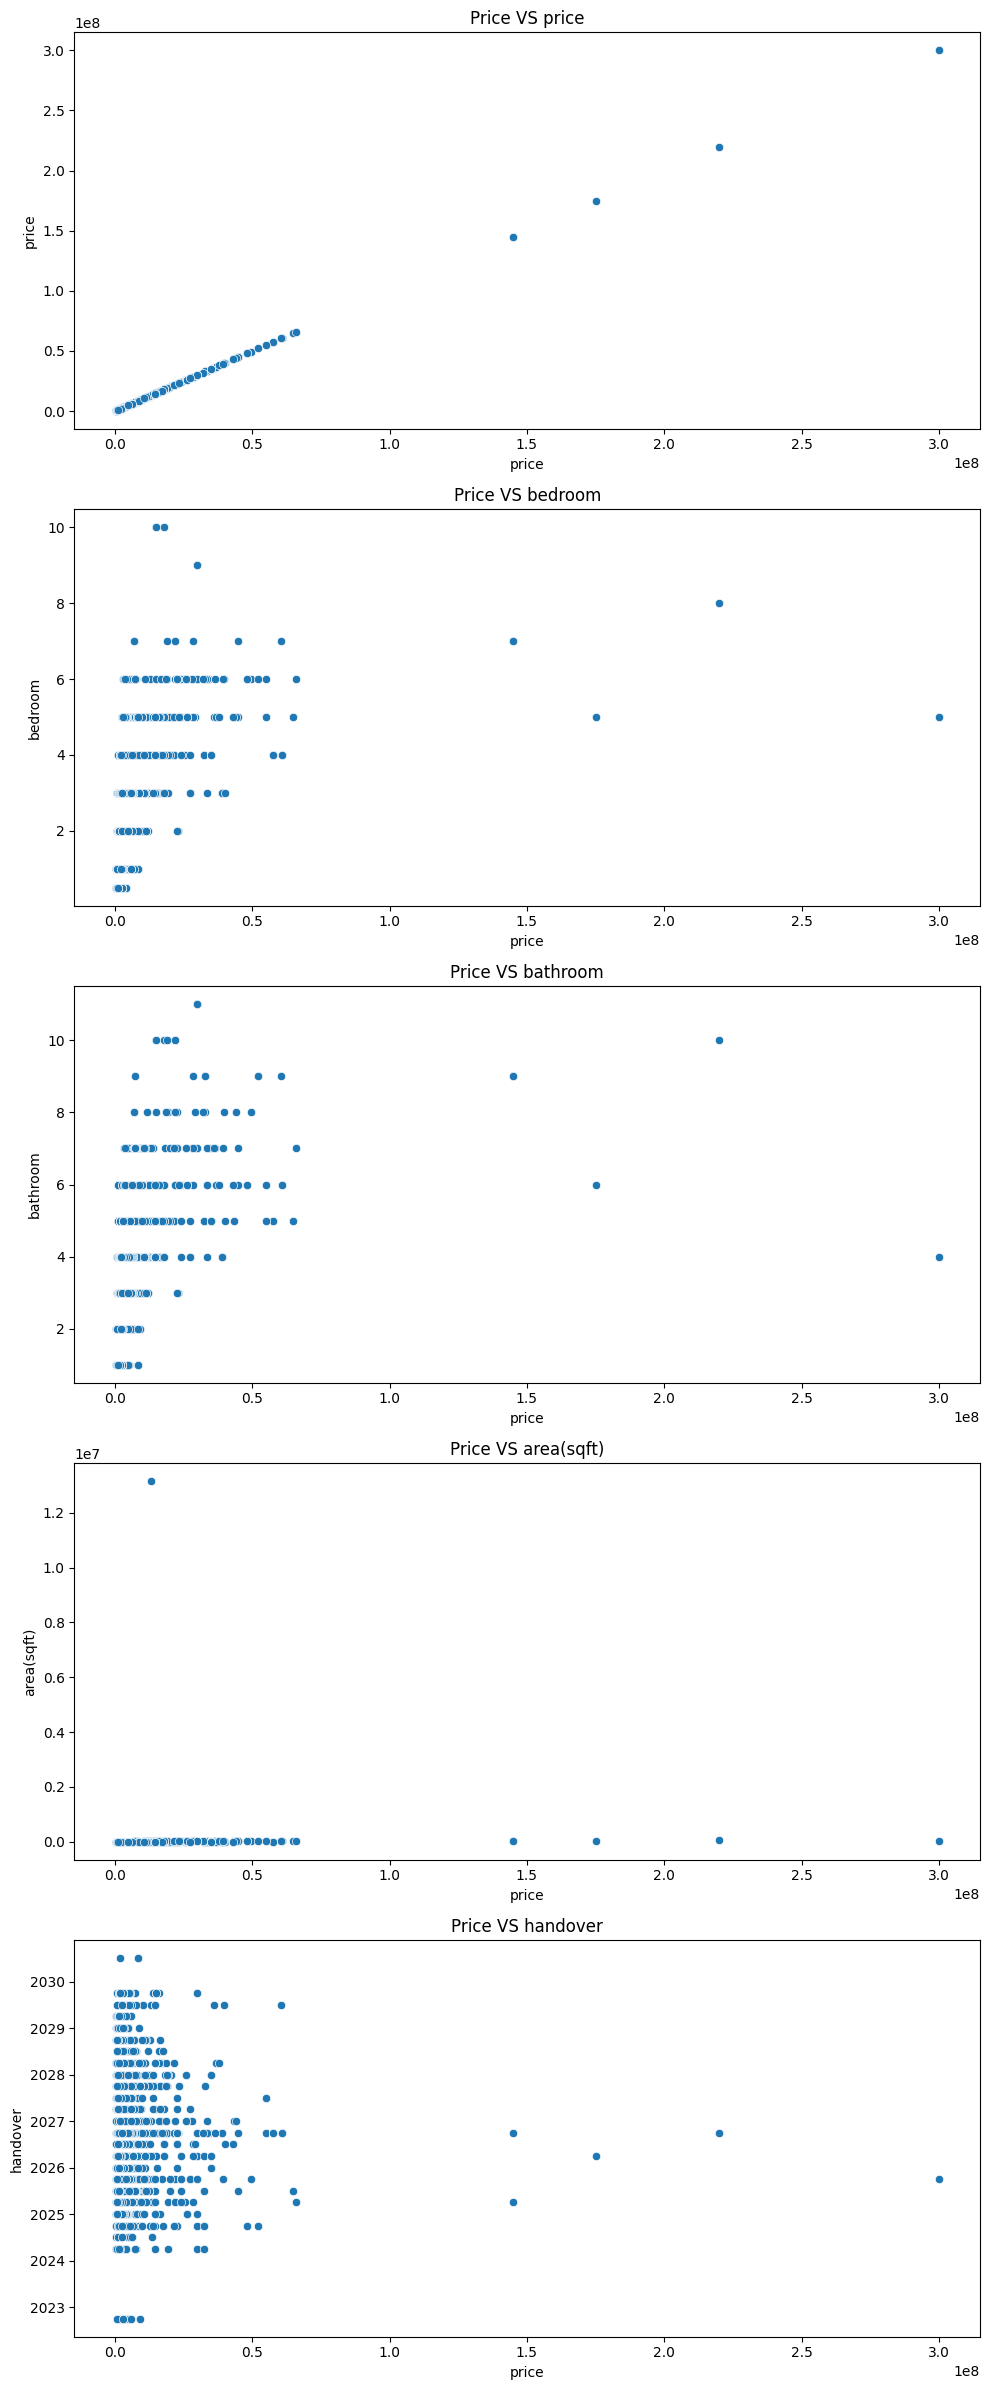

In [58]:
fig , ax = plt.subplots(len(numerical_feature),1,figsize=(10,24))
#plt.suptitle("Price VS Numerical Feature")
for i ,feature in enumerate(numerical_feature):
    sns.scatterplot(x=dataframe['price'],y= dataframe[feature],ax=ax[i])
    ax[i].set_title(f"Price VS {feature}")
plt.tight_layout()
plt.show()

 ### Observation:
 `price`,`area` should be log transformed 